# Procrastinate Pro+

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Моя задача — разобраться в причинах и помочь компании выйти в плюс.  

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
*  лог сервера с данными об их посещениях,  
*  выгрузка их покупок за этот период,  
*  рекламные расходы. 

Предстоит изучить:  
*  откуда приходят пользователи и какими устройствами они пользуются,  
*  сколько стоит привлечение пользователей из различных рекламных каналов;  
*  сколько денег приносит каждый клиент,  
*  когда расходы на привлечение клиента окупаются,  
*  какие факторы мешают привлечению клиентов.  

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

**Структура visits_info_short.csv:**
User Id — уникальный идентификатор пользователя,  
Region — страна пользователя,  
Device — тип устройства пользователя,  
Channel — идентификатор источника перехода,  
Session Start — дата и время начала сессии,  
Session End — дата и время окончания сессии.  


**Структура orders_info_short.csv:**  
User Id — уникальный идентификатор пользователя,  
Event Dt — дата и время покупки,  
Revenue — сумма заказа.  


**Структура costs_info_short.csv:**  
dt — дата проведения рекламной кампании,  
Channel — идентификатор рекламного источника,  
costs — расходы на эту кампанию.  

Для начала работы загрузим библиотеки, выгрузим файлы и посмотрим общую информацию о них.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv').copy()
    orders = pd.read_csv('/datasets/orders_info_short.csv').copy()
    costs = pd.read_csv('/datasets/costs_info_short.csv').copy()
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_info_short.csv').copy()
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv').copy()
    costs = pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv').copy()

In [3]:
display(visits.head())
visits.info()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
print('Количество дубликатов:', visits.duplicated().sum())

Количество дубликатов: 0


In [5]:
display(orders.head())
orders.info()
orders.describe()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


In [6]:
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


In [7]:
display(costs.head())
costs.info()
costs.describe()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


In [8]:
print('Количество дубликатов:', costs.duplicated().sum())

Количество дубликатов: 0


**Вывод:** Выяснили, что пропусков и дубликатов нет. Для продолжения работы необходимо привести названия столбцов к единому стилю и изменить тип данных.

**Visits**

In [9]:
visits.columns = [i.lower().replace(' ', '_') for i in visits.columns.values]
visits.head()

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [10]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
display(visits.dtypes)

user_id                   int64
region                   object
device                   object
channel                  object
session_start    datetime64[ns]
session_end      datetime64[ns]
dtype: object

**Orders**

In [11]:
orders.columns = [i.lower().replace(' ', '_') for i in orders.columns.values]
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [12]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
display(orders.dtypes)

user_id              int64
event_dt    datetime64[ns]
revenue            float64
dtype: object

**Costs**

In [13]:
costs.rename(columns={'Channel':'channel'}, inplace=True)
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
display(costs.dtypes)

dt          object
channel     object
costs      float64
dtype: object

**Вывод:** Привели названия столбцов к единому стилю и изменили тип данных.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Зададим функцию для создания профилей пользователей.**

In [15]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles
 

**Зададим функцию для подсчёта Retention Rate.**

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Зададим функцию для подсчёта конверсии.**

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

**Зададим функцию для подсчёта LTV и ROI.**

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

**Зададим функцию для сглаживания данных.**

In [19]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

**Зададим функцию для построения графика Retention Rate.**

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )

    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

**Зададим функцию для построения графика конверсии.**

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 6))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

**Зададим функцию для визуализации LTV и ROI.**

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

**Создадим профили пользователей. Определим минимальную  максимальню дату привлеченя.**

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [24]:
min_analysis_date = profiles['dt'].min()
display(min_analysis_date)

max_analysis_date = profiles['dt'].max()
display(max_analysis_date)

datetime.date(2019, 5, 1)

datetime.date(2019, 10, 27)

Период с 1 мая 2019 по 27 октября 2019.

**Определим страны пользователей.**

In [25]:
(profiles.groupby('region').agg({'user_id':'nunique', 'payer':['sum', 'mean']})
.sort_values(by=([('payer','mean')]), ascending=False))

user_id payer          
              nunique   sum      mean
region                               
United States  100002  6902  0.069019
Germany         14981   616  0.041119
UK              17575   700  0.039829
France          17450   663  0.037994

* Основными пользователями являются жители США, более 100 тысяч. Они же самые платящие - 6,9%.  
* В Великобритании и Франции почти одинаковое количество пользователей, но у них 3,9% и 3,7% платящих.  
* На последнем месте пользователи из Германии, почти 15 тысяч пользователей. Однако, они занимают второе место по платящим - 4,1%

**Определим устройства пользователей.**

In [26]:
(profiles.groupby('device').agg({'user_id':'nunique', 'payer':['sum', 'mean']})
.sort_values(by=([('payer','mean')]), ascending=False))

user_id payer          
        nunique   sum      mean
device                         
Mac       30042  1912  0.063644
iPhone    54479  3382  0.062079
Android   35032  2050  0.058518
PC        30455  1537  0.050468

*  Наибольшее количество пользователей являются владельцами iPhone - 54479 пользователей. Доля платящих при этом 6,2%.  
*  Наименьшее количество пользователей - владельцы Mac. Но они имеют наибольшую долю платящих - 6,3%.  
*  Пользователей с Android более 35 тысяч и из них 5,8% платящих.  
*  Владельцы PC занимают второе место по количеству пользователей, но имеют наименьший процент платящих - 5%.


**Определим рекламные источники.**

In [27]:
profiles.groupby('channel').agg({'user_id':'nunique', 'payer':['sum', 'mean']})\
    .sort_values(by=[('payer','mean')], ascending=False)

user_id payer          
                   nunique   sum      mean
channel                                   
FaceBoom             29144  3557  0.122049
AdNonSense            3880   440  0.113402
lambdaMediaAds        2149   225  0.104700
TipTop               19561  1878  0.096007
RocketSuperAds        4448   352  0.079137
WahooNetBanner        8553   453  0.052964
YRabbit               4312   165  0.038265
MediaTornado          4364   156  0.035747
LeapBob               8553   262  0.030633
OppleCreativeMedia    8605   233  0.027077
organic              56439  1160  0.020553

*  Больше всего пользователей пришли по органическому каналу, более 56 тысяч. Они имеют наименьший процент платящих - 2%.  
*  FaceBoom занимает второе место по количеству пользователей, более 29 тысяч. И являются самыми плятащими - 12%.  
*  AdNonSense привлек 3880 новых пользователей и показал один из лучших результатов по платящим - 11%.  
*  lambdaMediaAds привлек 2149 пользователей, а TipTop 19561. У них 10% и 9% соответственно платящих.  
*  Каналы RocketSuperAds, WahooNetBanner, YRabbit, MediaTornado, LeapBob, OppleCreativeMedia привлекли от 4 до 8 тысяч пользователей и имеют от 2 до 7% платящих.

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

**Посчитаем общую сумму расходов на маркетинг.**

In [28]:
display(profiles.groupby('channel').agg({'user_id':'nunique','acquisition_cost':['sum','mean']})
.sort_values(by=[('acquisition_cost', 'mean')], ascending=False))


print(f"Сумма расходов по всем каналам привлечения: {costs['costs'].sum():.2f}")
print('Средняя стоимость привлечения пользователя:',
costs['costs'].sum() / len(profiles.query('channel != "organic"')))

user_id acquisition_cost          
                   nunique              sum      mean
channel                                              
TipTop               19561         54751.30  2.799003
FaceBoom             29144         32445.60  1.113286
AdNonSense            3880          3911.25  1.008054
lambdaMediaAds        2149          1557.60  0.724802
WahooNetBanner        8553          5151.00  0.602245
RocketSuperAds        4448          1833.00  0.412095
OppleCreativeMedia    8605          2151.25  0.250000
YRabbit               4312           944.22  0.218975
MediaTornado          4364           954.48  0.218717
LeapBob               8553          1797.60  0.210172
organic              56439             0.00  0.000000

Сумма расходов по всем каналам привлечения: 105497.30
Средняя стоимость привлечения пользователя: 1.127481323942759


/tmp/ipykernel_619/4059059179.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(121)
/tmp/ipykernel_619/4059059179.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)
/tmp/ipykernel_619/4059059179.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and ret

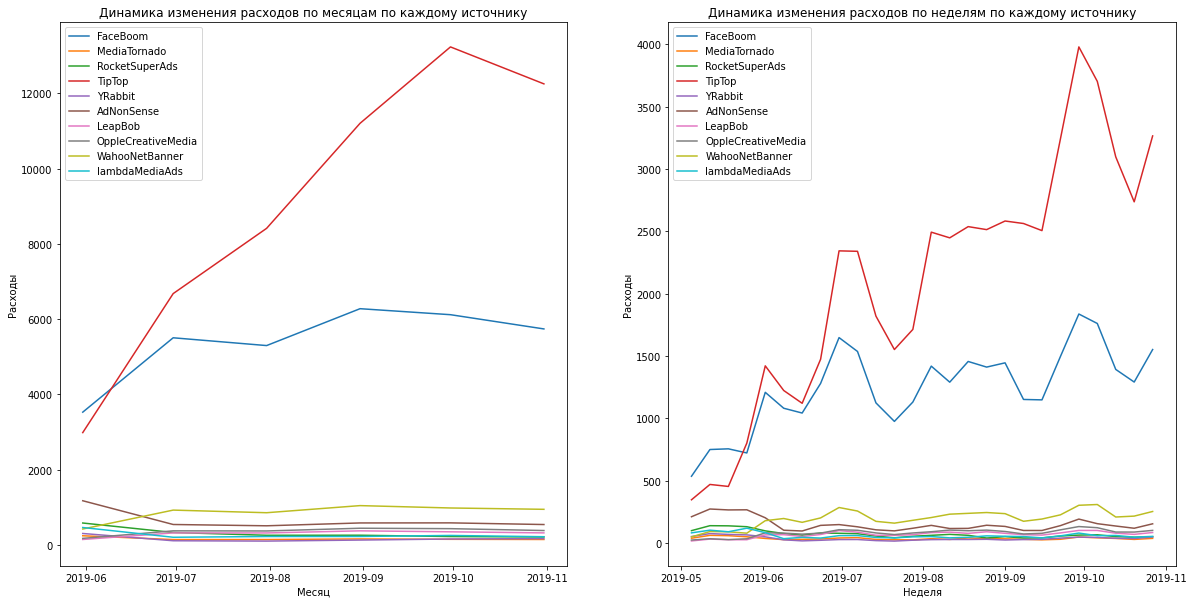

In [29]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs.set_index('dt', inplace=True)

plt.figure(figsize=(20, 10))

for channel in costs['channel'].unique():
    m_data = costs[costs['channel'] == channel].resample('M').sum()
    w_data = costs[costs['channel'] == channel].resample('W').sum()
    
    plt.subplot(121)
    plt.plot(m_data.index, m_data['costs'], label=channel)
    plt.xlabel('Месяц')
    plt.ylabel('Расходы')
    plt.title('Динамика изменения расходов по месяцам по каждому источнику')
    plt.legend()
    
    plt.subplot(122)
    plt.plot(w_data.index, w_data['costs'], label=channel)
    plt.xlabel('Неделя')
    plt.ylabel('Расходы')
    plt.title('Динамика изменения расходов по неделям по каждому источнику')
    plt.legend()

plt.show()

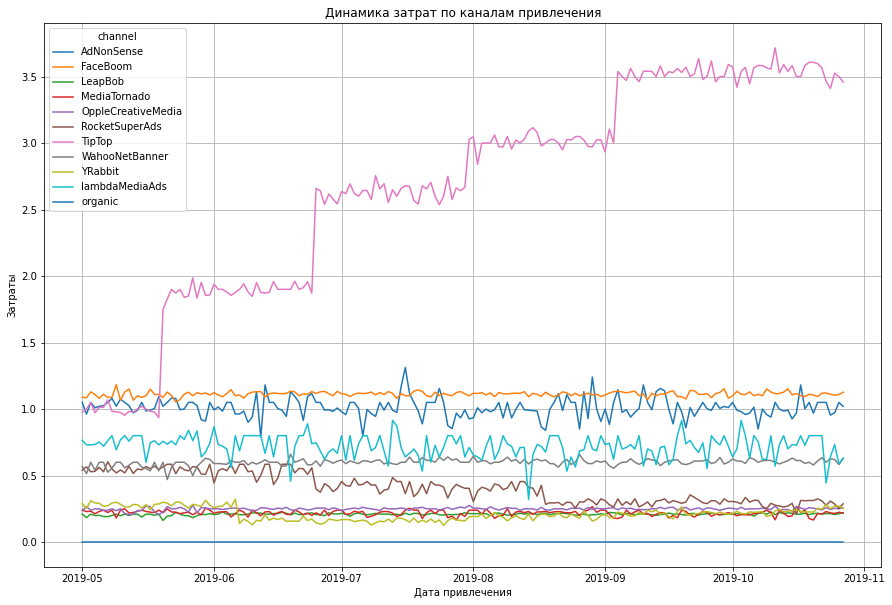

In [30]:
profiles.pivot_table(index='dt', columns='channel', values='acquisition_cost', aggfunc='mean').plot(grid=True, figsize=(15, 10))
plt.ylabel('Затраты')
plt.xlabel('Дата привлечения')
plt.title('Динамика затрат по каналам привлечения')
plt.show()

**Вывод:**

*  Лидером является TipTop. Это самый дорогой канал привлечения. Изначально один пользователь стоил 1, но ежемесячно стоимость росла и к ноябрю один пользователь примерно стоил 3,5. Средяя стоимость 2,7.

*  FaceBoom	имеет наименьшие колебания. Стоимость пользователя около 1.

*  AdNonSense и lambdaMediaAds имеют постоянные колебания. Стоимость пользователя около 1 и 0,72 соответственно.

*  RocketSuperAds - средняя стоимость пользователя 0,41. В начале стоимость была около 0,6. Но с июля стоимость снизилась до около 0,3.

*  Остальные каналы показывают относительно стабильные показатели цены за пользователя.  

*  На графике динамики недельных и месячных расходов видим зависимость между тратами в месяц и тратами на TipTop. Сумма стабильно растет каждый месяц. На графике с недельными расходами так же отмечается зависимость.  

**Посмотрим распределение каналов по странам.**

In [50]:
region_c = (profiles[profiles['payer']==True].
            pivot_table(index='channel', columns = 'region', values = 'user_id', aggfunc='count')
    .reset_index().sort_values('United States').query('channel != "organic"'))
region_c

region,channel,France,Germany,UK,United States
3,MediaTornado,NaN,NaN,NaN,156.0
8,YRabbit,NaN,NaN,NaN,165.0
5,RocketSuperAds,NaN,NaN,NaN,352.0
6,TipTop,NaN,NaN,NaN,1878.0
1,FaceBoom,NaN,NaN,NaN,3557.0
0,AdNonSense,150.0,142.0,148.0,NaN
2,LeapBob,90.0,69.0,103.0,NaN
4,OppleCreativeMedia,80.0,64.0,89.0,NaN
7,WahooNetBanner,152.0,148.0,153.0,NaN
9,lambdaMediaAds,82.0,67.0,76.0,NaN


Таким образом вы мыяснили, что для США и Европы используются разные каналы привлечения.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [38]:
observation_date = datetime(2019,11,1).date()
horizon_days = 14
paid_profiles = profiles.query('channel != "organic"')

**Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей.**

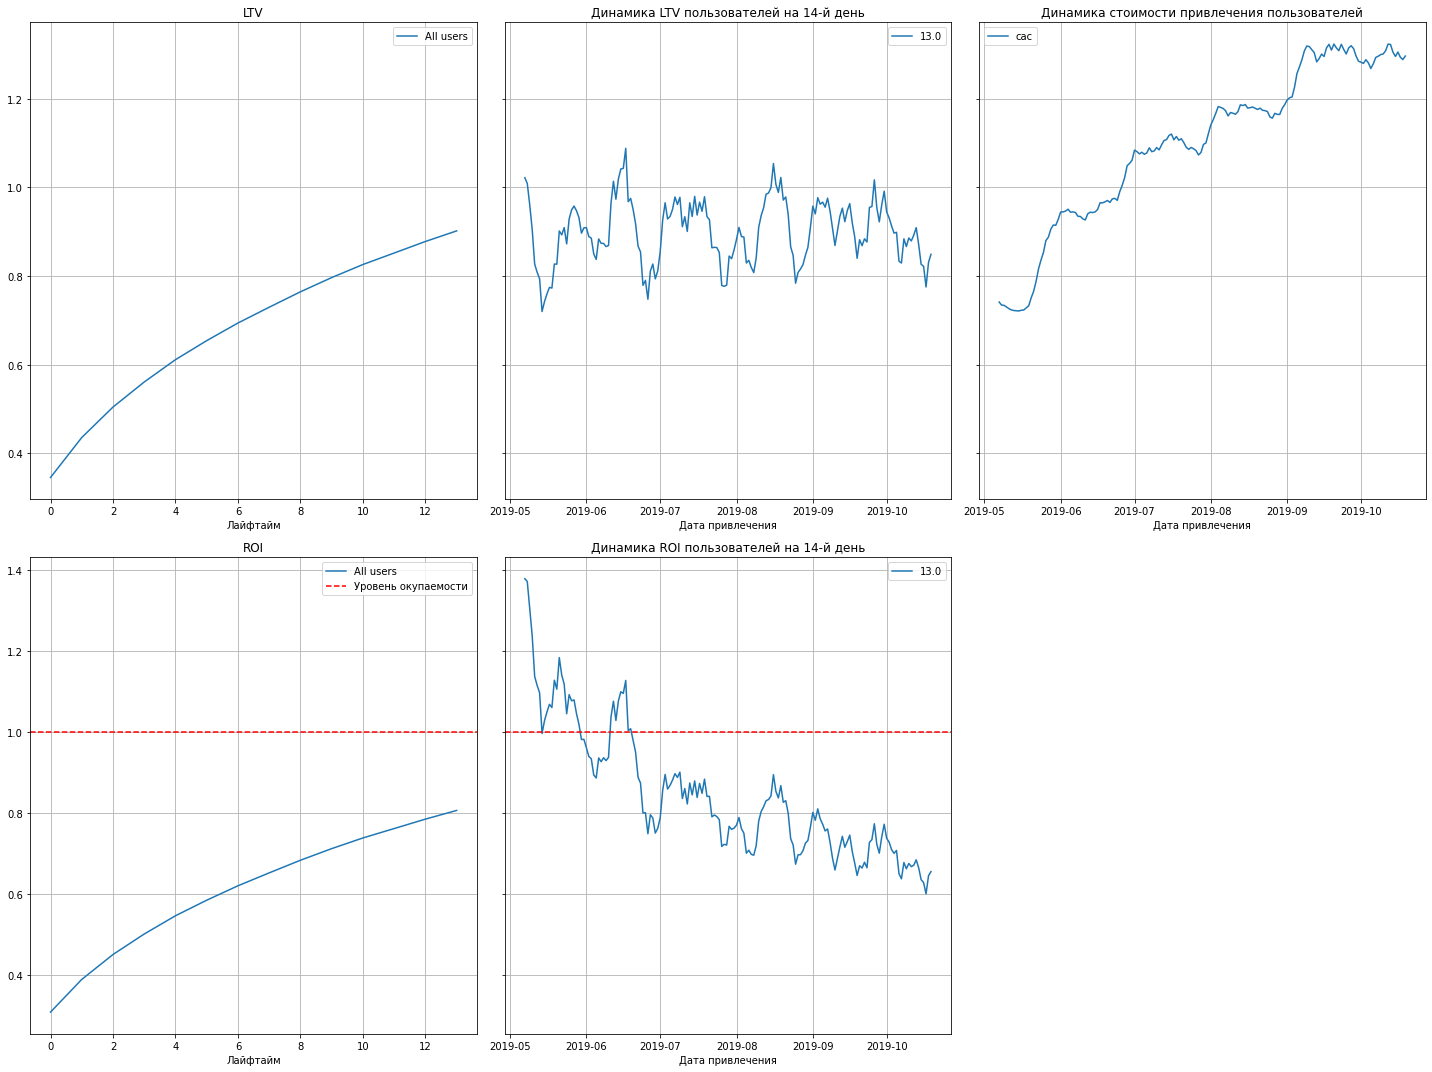

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

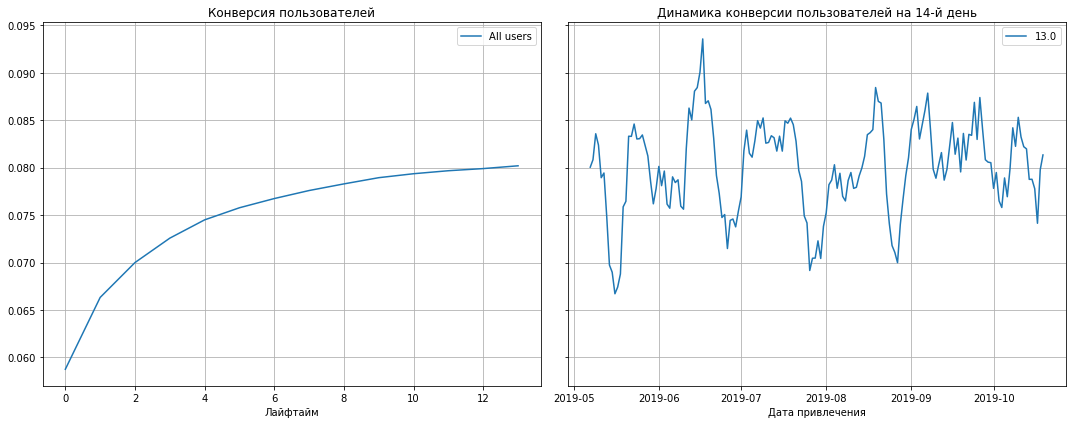

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
paid_profiles, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

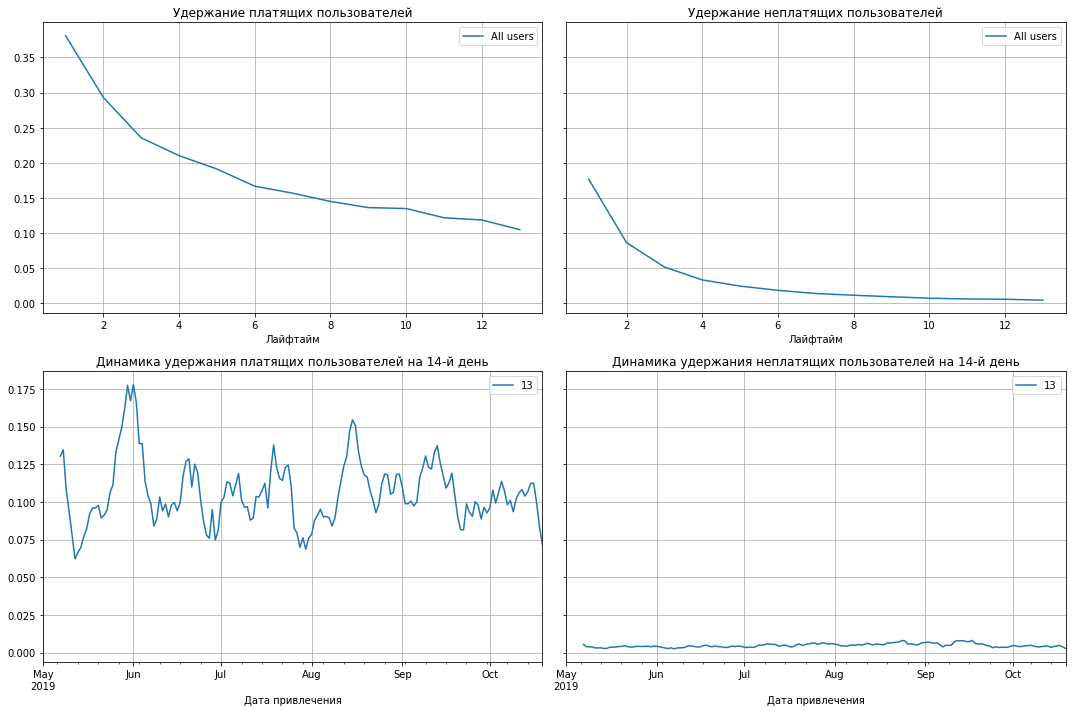

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
paid_profiles, visits, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:**

*  ROI составляет 80%, то есть реклама не окупается. В июне был небольшой рост, однако окупаемость снижается каждый месяц.  

*  На динамике стоимости привлечения пользователя отражен ежемесячный рост с июня. Ранее мы выяснили, что TipTop является самым дорогим каналом привлечения и самым дорогим за одного пользователя. На графиках можно видеть схожесть в росте. 

*  С конверсией и графиком удержания все стабильно.  

**Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

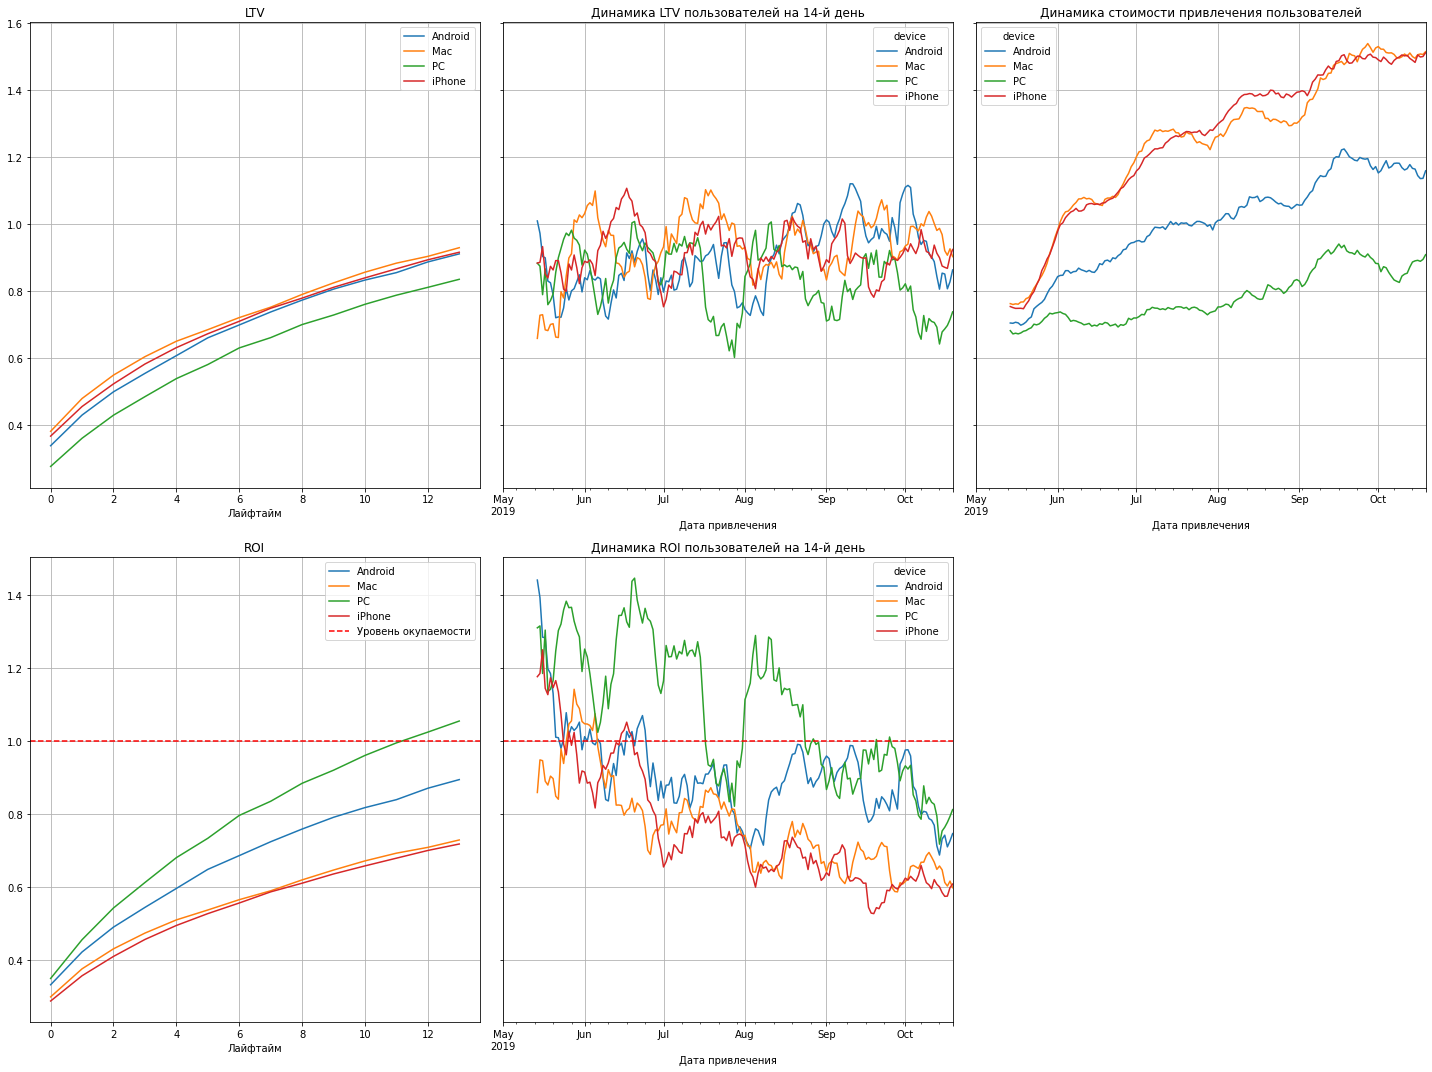

In [42]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['device'])

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

*  На графике видим, что на 11 день окупаются пользователи PC. Пользователи Mac и IPhone примерно на одном уровне.  
*  LTV пользователей Mac ниже всех. Остальные устройства примерно на одном уровне.  
*  Пользователи Mac и IPhone перестали окупать себя в июне.  
*  Android пользователи перестали окупаться в июле. В сентябре был скачок, но так и не окупились.  
*  Пользователи PC перестали окупаться в начале июля. Далее был скачок, но окупаемость снова прпала в сентябре.

**Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

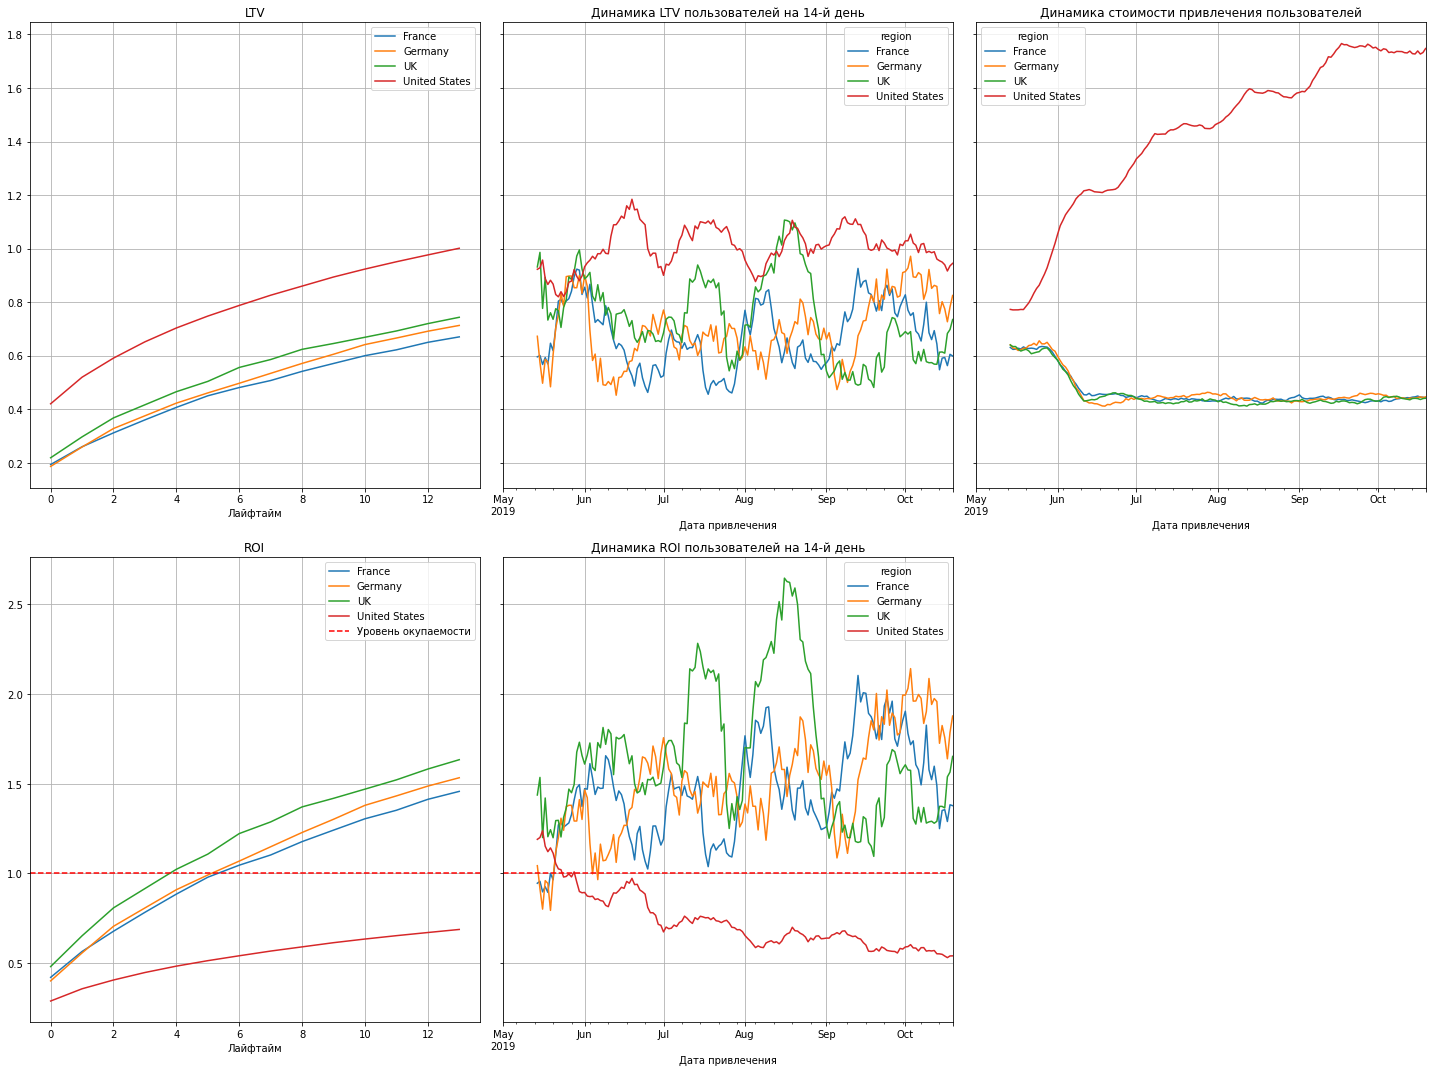

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

*  Пользователи из США имеют самый высокий показатель LTV. Но не окупают себя. При этом стоимость их привлечения стабильно растет.  
*  Пользователи других стран окупают себя на 3-4 день. Стоимость их привлечения почти на одном низком уровне.

**Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.**

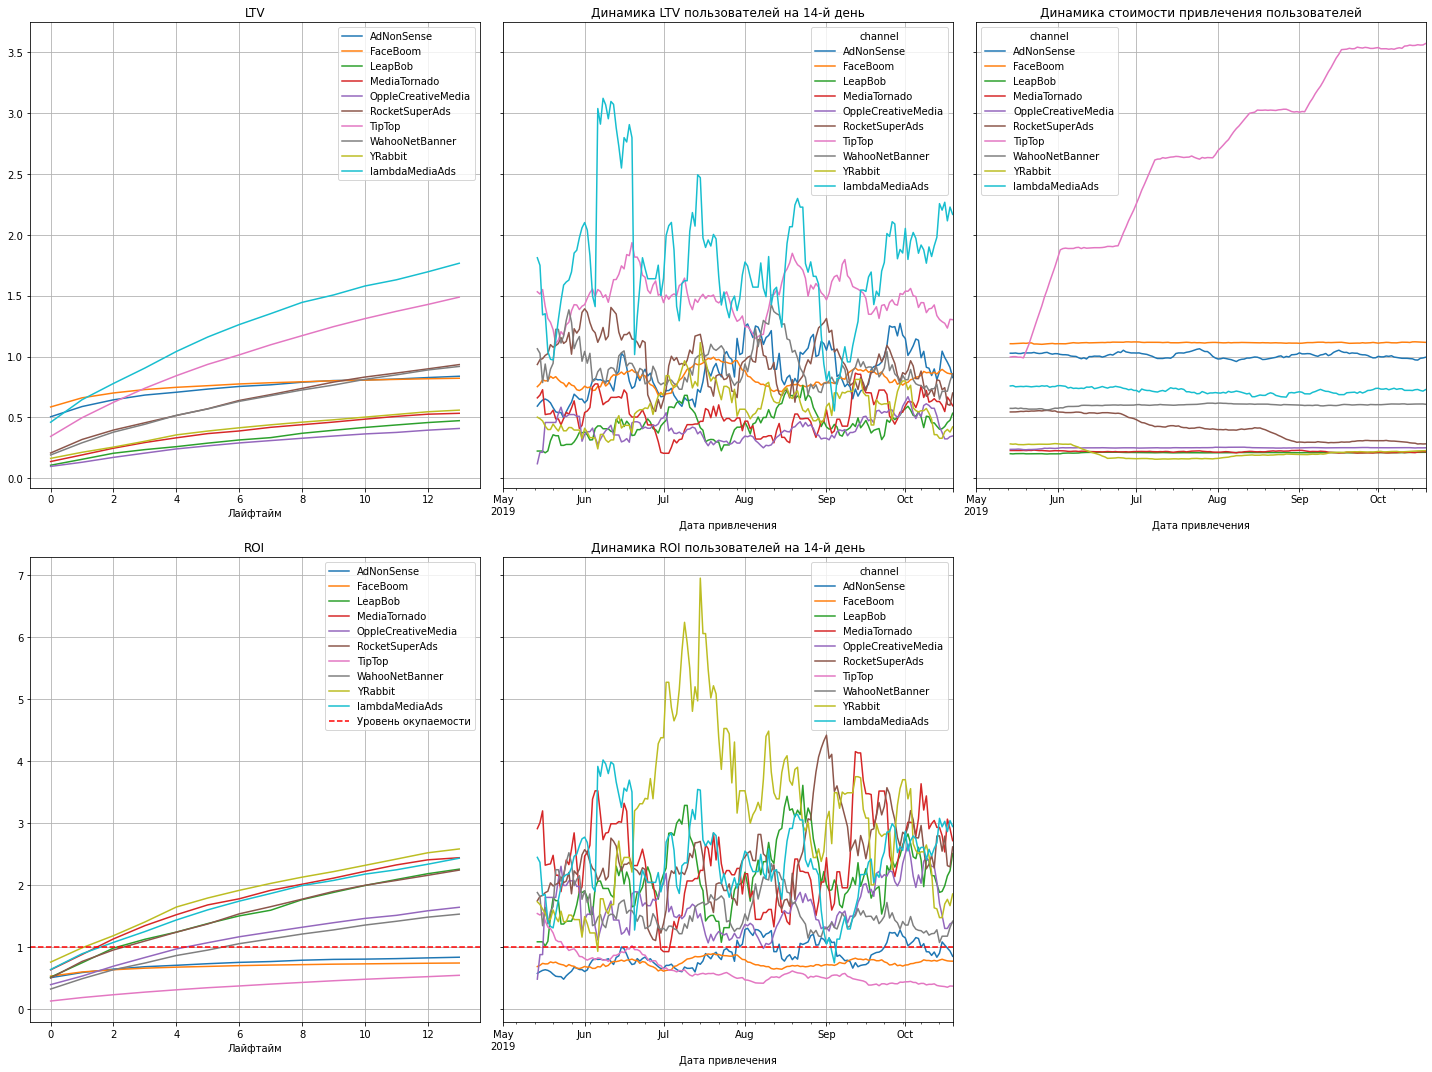

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

**Вывод:**

*  Лидерами роста LTV являются lambdsMediaAds и TipTop.  
*  AdNonSense, FaceBoom не окупаются, имеют небольшую разницу в затратах на одного пользователя. На 3-4 день LTV перестает расти.  
*  У TipTop стабильно растут затраты на привлечение одного пользователя, но окупаемости нет.  

**Проверим, какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы.**

**Устройства**

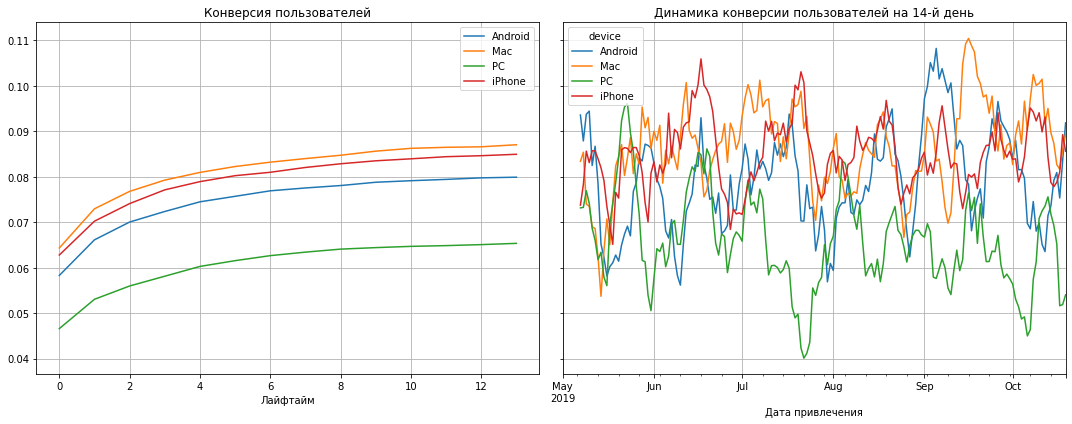

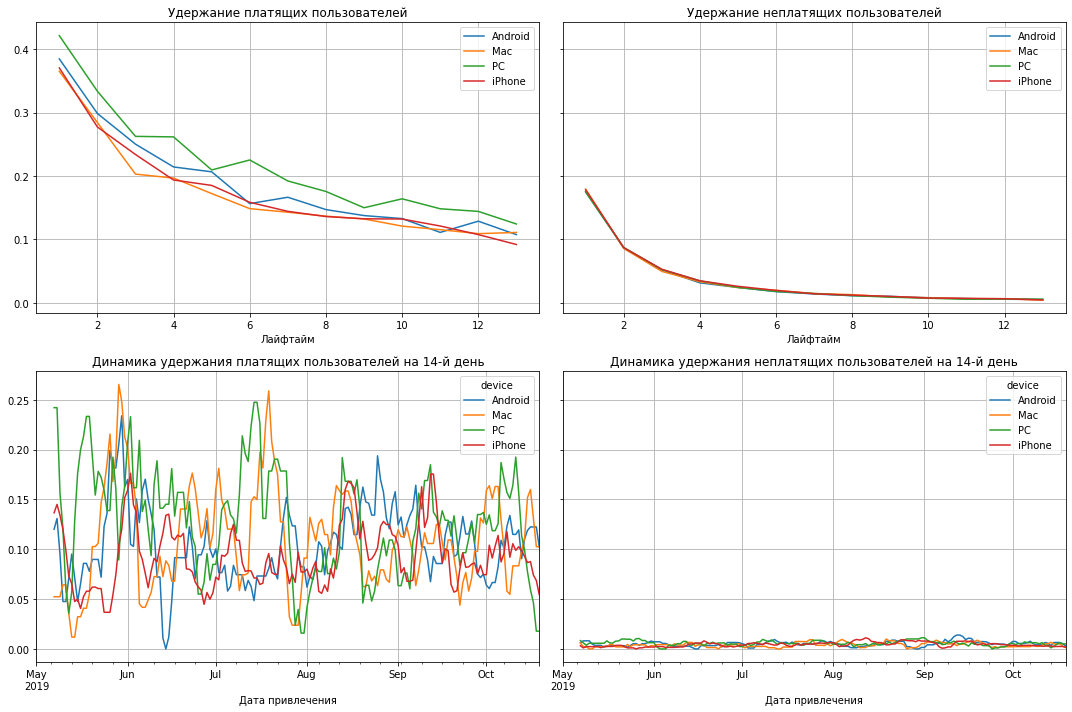

In [45]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['device'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=['device'])
plot_retention(retention_grouped, retention_history, horizon_days)

*  У владельцев  Mac и iPhone удержание ниже, чем у платящих владельцев Android и PC.
*  Владельцы  Mac и iPhone чаще делают первую покупку.    
*  Наименьшие показатели конверсии у владельцев PC. Но у них выше удержание.  
*  Удержание неплатящих пользователей имеет одинаковые показатели для всех устройств и стремится к 0.  

**Страны**

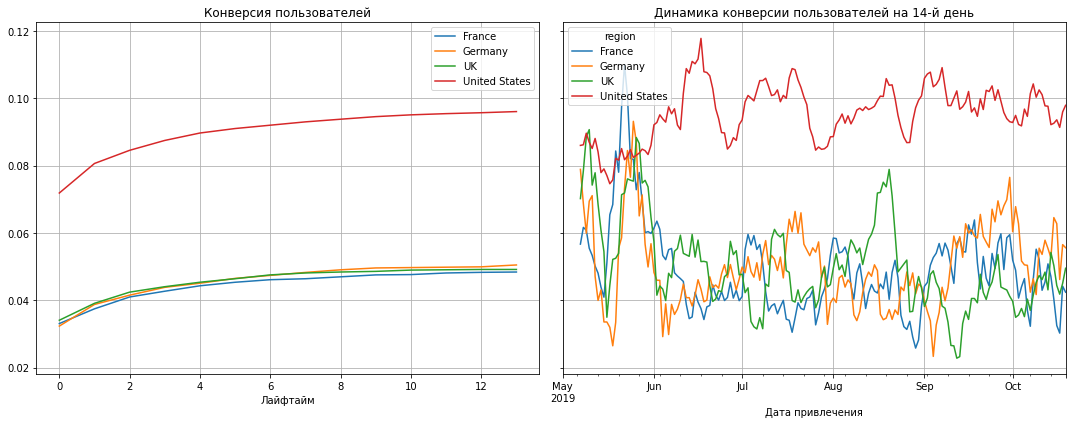

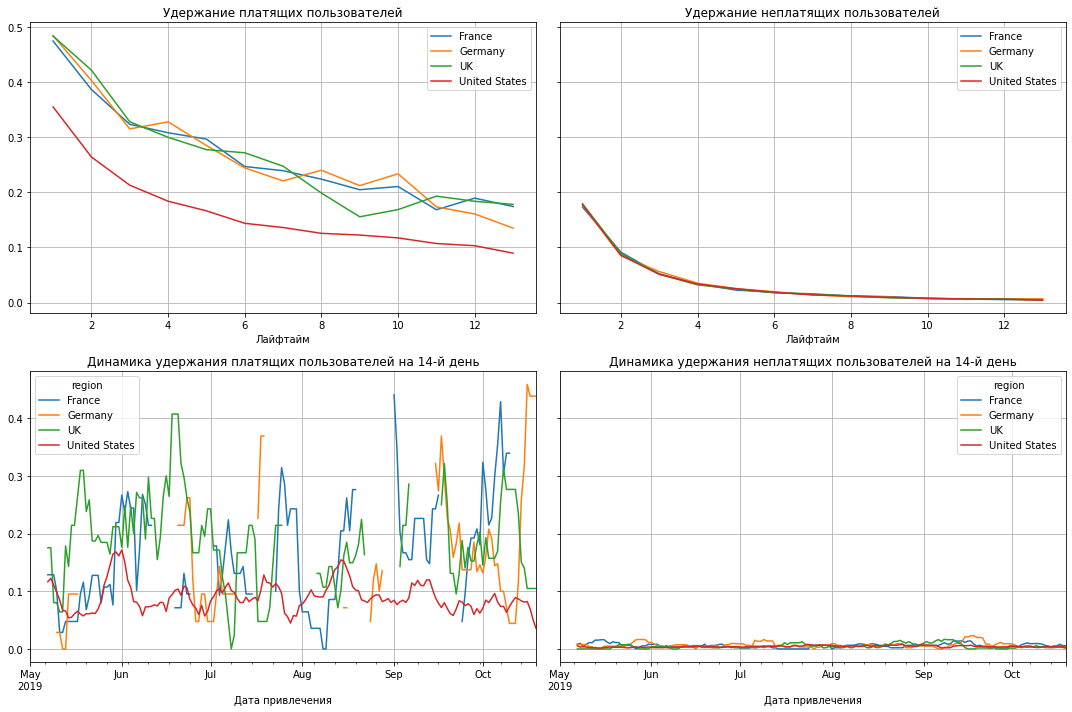

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['region'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=['region'])
plot_retention(retention_grouped, retention_history, horizon_days)

*  Платящие жители США имеют самые высокие показатели конверсии, но низкое удержание.  
*  Удержание платящих пользователей в других странах почти одинаково.  
*  Удержание неплатящих пользователей имеет одинаковые показатели во всех странах и стремится к 0.  

**Каналы привлечения**

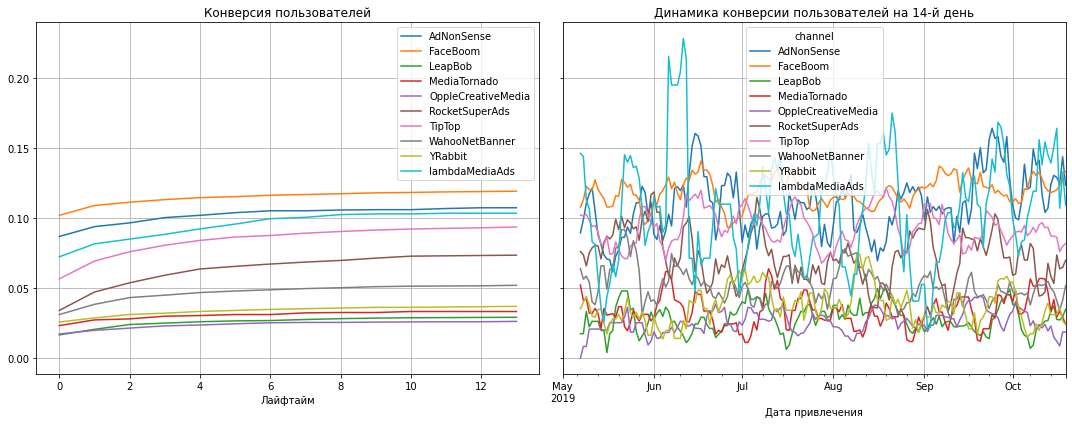

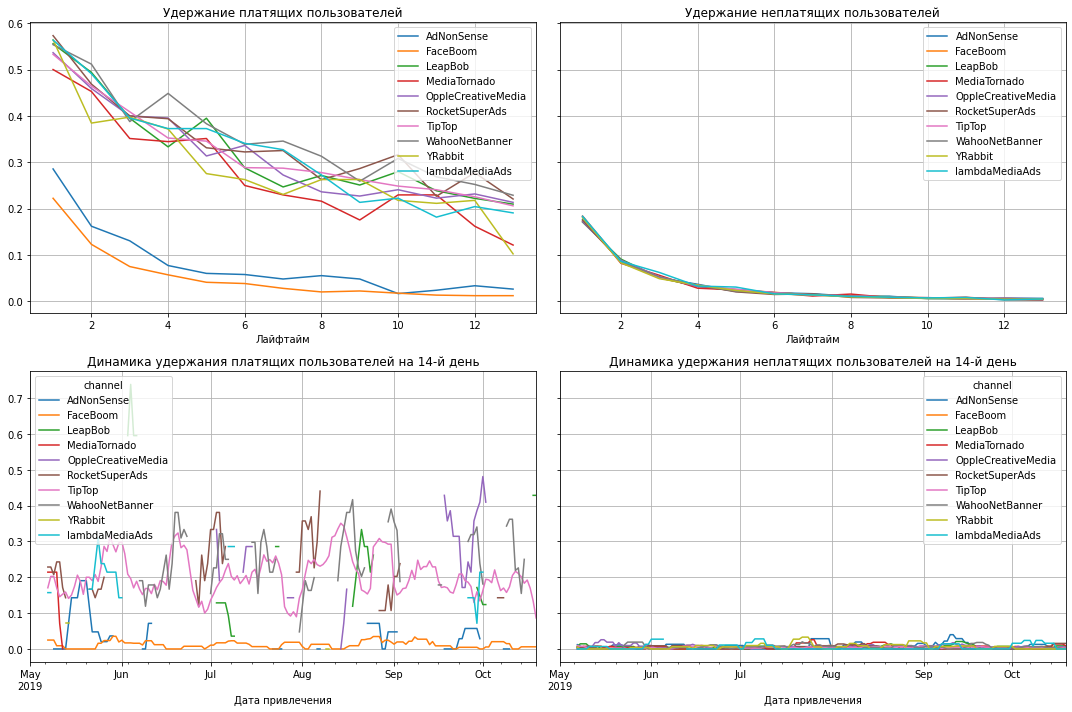

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    paid_profiles, orders, observation_date, horizon_days, dimensions=['channel'])
plot_conversion(conversion_grouped, conversion_history, horizon_days)


retention_raw, retention_grouped, retention_history = get_retention(
    paid_profiles, visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days)

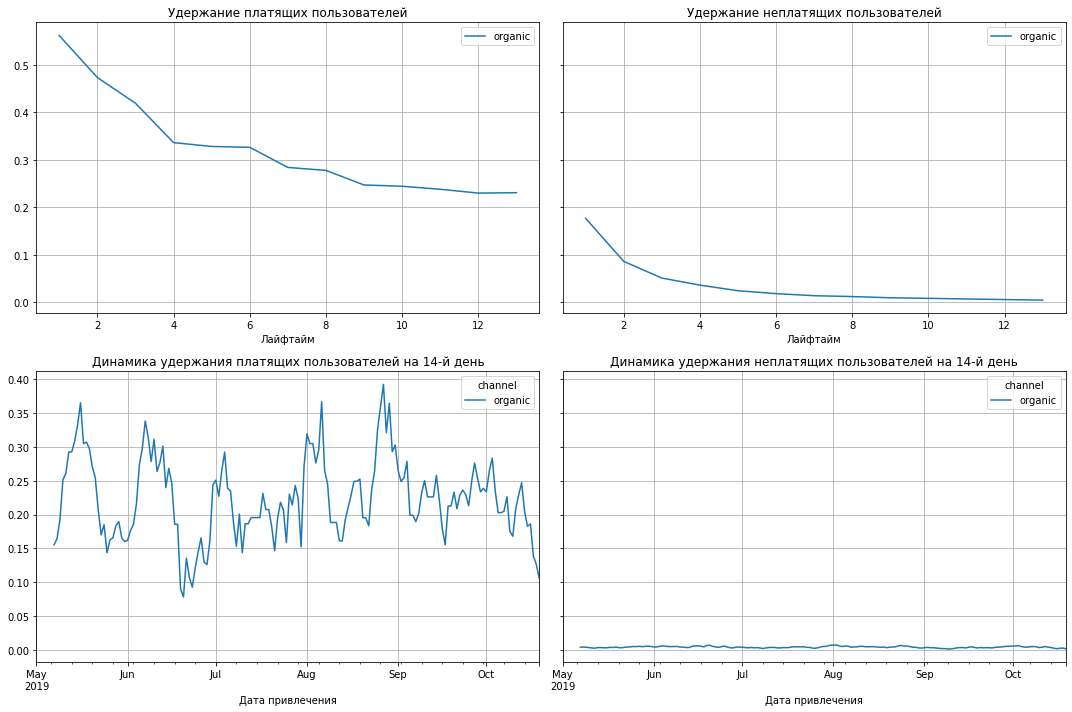

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel == ["organic"]'), visits, observation_date, horizon_days, dimensions=['channel'])
plot_retention(retention_grouped, retention_history, horizon_days)

*  Лидерами по конверсии янвляются каналы FaceBoom, AdNonSense,lambdaMediaAds и TipTop.  
*  При этом у FaceBoom и AdNonSense самое низкое удержание пользователей.  
*  TipTop и lambdaMediaAds имеют средние показатели удержания.  
*  При проверке органического графика выяснили, что при низкой конверсии удержание не отличается от платных каналов привлечения.

### Напишите выводы


*  Самый дорогой канал привлечения это TipTop. Цена на правлечение одного пользователя увеличивалась каждый месяц. При этом он не окупает затраты на привлечение.  
*  FaceBoom, AdNonSense так же не окупают затраты.  
*  Самая большая доля платящих - это жители США. Но удержание их самое низкое.  

Рекомендации:  
*  Отказаться от TipTop в США. Канал имеет высокую стоимость и не окупается. И от FaceBoom, у него низкое удержание.  
*  Сделать упор на RocketSuperAds в США. Канал имеет не плохие показатели стоимости и окупаемости.  
*  Для Европы рассмотреть канал lambdaMediaAds из-за низкой стоимости привлечения и большого количества платящих. А от AdNonSense отказаться.  